In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

from models.wimp import SIWIMP
from models.wimp import SIWIMP_Helm
from models.inelastic import SIInel
from detectors.dama import DAMA
from detectors.cosine import COSINE
from veldists import VelDist
from constants import *

In [2]:
## Step 1
Det = DAMA()
Model1 = SIWIMP()
Model2 = SIInel()
Dist = VelDist("modSHM",0.3) # standard halo model
Dist2 = VelDist("modShards",0.3) # standard halo model + shards

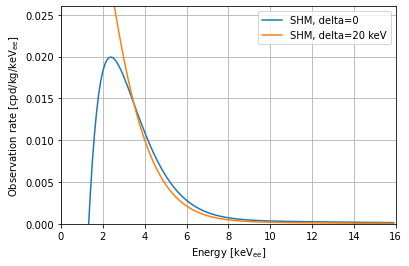

In [6]:
## Step 2 
E = np.arange(0,16,0.1) # observed energy, units of keV_ee
plt.plot(E,[Det.dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist) for e in E]) ## note here you can pass the model variables as kwargs
plt.plot(E,[Det.dRdE(e,Model2.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist,delta=20*keV) for e in E]) ## note here you can pass the model variables as kwargs
plt.legend(["SHM, delta=0","SHM, delta=20 keV"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
plt.xlim(0,16)
plt.ylim(0,0.026)
plt.grid()
plt.show()

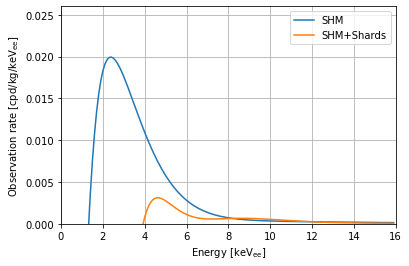

In [9]:
E = np.arange(0,16,0.1) # observed energy, units of keV_ee
plt.plot(E,[Det.dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist) for e in E]) ## note here you can pass the model variables as kwargs
plt.plot(E,[Det.dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist2) for e in E]) ## note here you can pass the model variables as kwargs
plt.legend(["SHM","SHM+Shards"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
plt.xlim(0,16)
plt.ylim(0,0.026)
plt.grid()
plt.show()

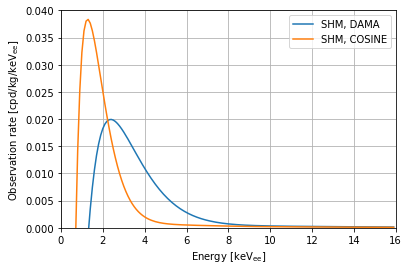

In [10]:
E = np.arange(0,16,0.1) # observed energy, units of keV_ee
plt.plot(E,[Det.dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist) for e in E]) ## note here you can pass the model variables as kwargs
plt.plot(E,[COSINE().dRdE(e,Model1.dRdER,mX=62*GeV,sig=1.1E-41,VelDist=Dist) for e in E]) ## note here you can pass the model variables as kwargs
plt.legend(["SHM, DAMA","SHM, COSINE"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
plt.xlim(0,16)
plt.ylim(0,0.04)
plt.grid()
plt.show()

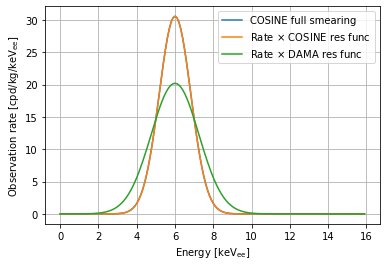

In [16]:
#### Demonstration of how to define DM rates/interactions without needing to build a new model object
##### Doubles as a demo of how to use the resolution as a multiplier rather than full smearing (in this case the two are equivalent) 

def bsw(Target,ER,mX,sig): 
    if ER!=mX:
        return 0
    else:
        C_a = 1.2 * 10**(19)
        g_ae = sig
        dsigdER = (C_a/(Target.A()))*(g_ae**2)*mX*(Target.sigma_PE(ER))
        return dsigdER
    
E = np.arange(0,16,0.1) # observed energy, units of keV_ee
plt.plot(E,[COSINE().dRdE(e,bsw,NR=False,DE=0.01,mX=6.00*keV,sig=1) for e in E])
plt.plot(E,[COSINE().dRdE_True(6,bsw,NR=False,mX=6*keV,sig=1)*COSINE().Res(e,6) for e in E]) ## This model is a delta func so we can just scale gaussian resolution with the max val
plt.plot(E,[DAMA().dRdE_True(6,bsw,NR=False,mX=6*keV,sig=1)*DAMA().Res(e,6) for e in E]) ## demonstrate how to use different detector
plt.legend(["COSINE full smearing",r"Rate $\times$ COSINE res func",r"Rate $\times$ DAMA res func"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
plt.grid()
plt.show()

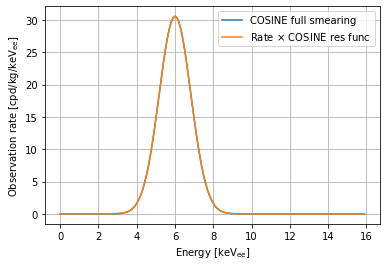

In [42]:
def bsw_gauss(Target,ER,mX,sig): 
    C_a = 1.2 * 10**(19)
    g_ae = sig
    dsigdER = (C_a/(Target.A()))*(g_ae**2)*mX*(Target.sigma_PE(mX))
    return dsigdER*COSINE().Res(ER*1E-3,mX*1E-3) ## resolution function requires units of keV
    
E = np.arange(0,16,0.1) # observed energy, units of keV_ee
plt.plot(E,[COSINE().dRdE_True(6,bsw,NR=False,mX=6*keV,sig=1)*COSINE().Res(e,6) for e in E])
plt.plot(E,[COSINE().dRdE_True(e,bsw_gauss,NR=False,mX=6*keV,sig=1) for e in E])
plt.legend(["COSINE full smearing",r"Rate $\times$ COSINE res func",r"Rate $\times$ DAMA res func"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
plt.grid()
plt.show()